In [1]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":300,
    "font.size":8,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)
legend_fs=10
label_fs=14
ticklabel_fs=10
from utils.plot_utils import *
from plot_helper import *
customize_plt() # customize plt configs, see plot_utils

In [2]:
# get the predictions and calculate the errors

methods=['DeepAR_optuna','LR_NAIVE','LR_PCo','TFT_optuna','XGB']
df=pd.read_csv(r'L:\Coding_project\Energy_grid_new\data\UCSD_raw_data\BLD_Sum.csv',index_col=0)
df.index=pd.to_datetime(df.index)
df_pred=df[pd.Timestamp(2019,1,1,0,0):pd.Timestamp(2019,12,31,23,45)]

for method in methods:
    fn=os.path.join('L:\Coding_project\Energy_grid_new\data\load_forecast',method,'BLD_Sum.csv')
    df=pd.read_csv(fn,index_col=0)
    df.index=pd.to_datetime(df.index)
    df.rename(columns={'RealPower':method},inplace=True)
    try:
        df_pred=pd.merge(df_pred,df,on='DateTime')
    except:
        ...
    
df_pred=df_pred.drop(columns=['RealPower_before_scaling'])   


In [3]:
df_pred.columns

Index(['RealPower', 'DeepAR_optuna', 'LR_NAIVE', 'LR_PCo', 'TFT_optuna',
       'XGB'],
      dtype='object')

In [4]:
methods=['DeepAR_optuna', 'LR_NAIVE', 'LR_PCo', 'TFT_optuna', 'XGB']
for m in methods:
    mape_abs=np.abs(np.array((df_pred[m]-df_pred['RealPower'])/df_pred['RealPower']))
    print(m)
    print(np.quantile(mape_abs,0.9))
    
heuristic=r"L:\Coding_project\Energy_grid_new_exp_local\BLD_simple_grid_search\BLD_sum_Simple_prediction_K96_4weeks_0.1.csv"
heuristic_df=pd.read_csv(heuristic)
heuristic_df=heuristic_df.dropna(axis=0,how='any')

for m in ['E_96','E_48','E_1']:
    mape_abs=np.abs(np.array((heuristic_df[m])/heuristic_df['RealPower']))
    print(m)
    print(np.quantile(mape_abs,0.9))

DeepAR_optuna
0.22814759074364444
LR_NAIVE
0.13196142031097235
LR_PCo
0.09838609690247416
TFT_optuna
0.10267218392049833
XGB
0.08064046822109709
E_96
0.1810561711192266
E_48
0.20053897781458926
E_1
0.03656823302432911


In [5]:
df_pred=df_pred[pd.Timestamp(2019,5,1,0,0):pd.Timestamp(2019,5,7,0,0)]
metrics=pd.read_excel(r'L:\Coding_project\Energy_grid_new\load_pred\model_metrics.xlsx',index_col=0)
metrics=metrics.drop(index='TFT_NAIVE')

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_33016\562773265.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticklabel_fs)
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_33016\562773265.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=ticklabel_fs)
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_33016\562773265.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=ticklabel_fs)
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_33016\562773265.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=ticklabel_fs)


Text(-0.05, 34.5, '(a)')

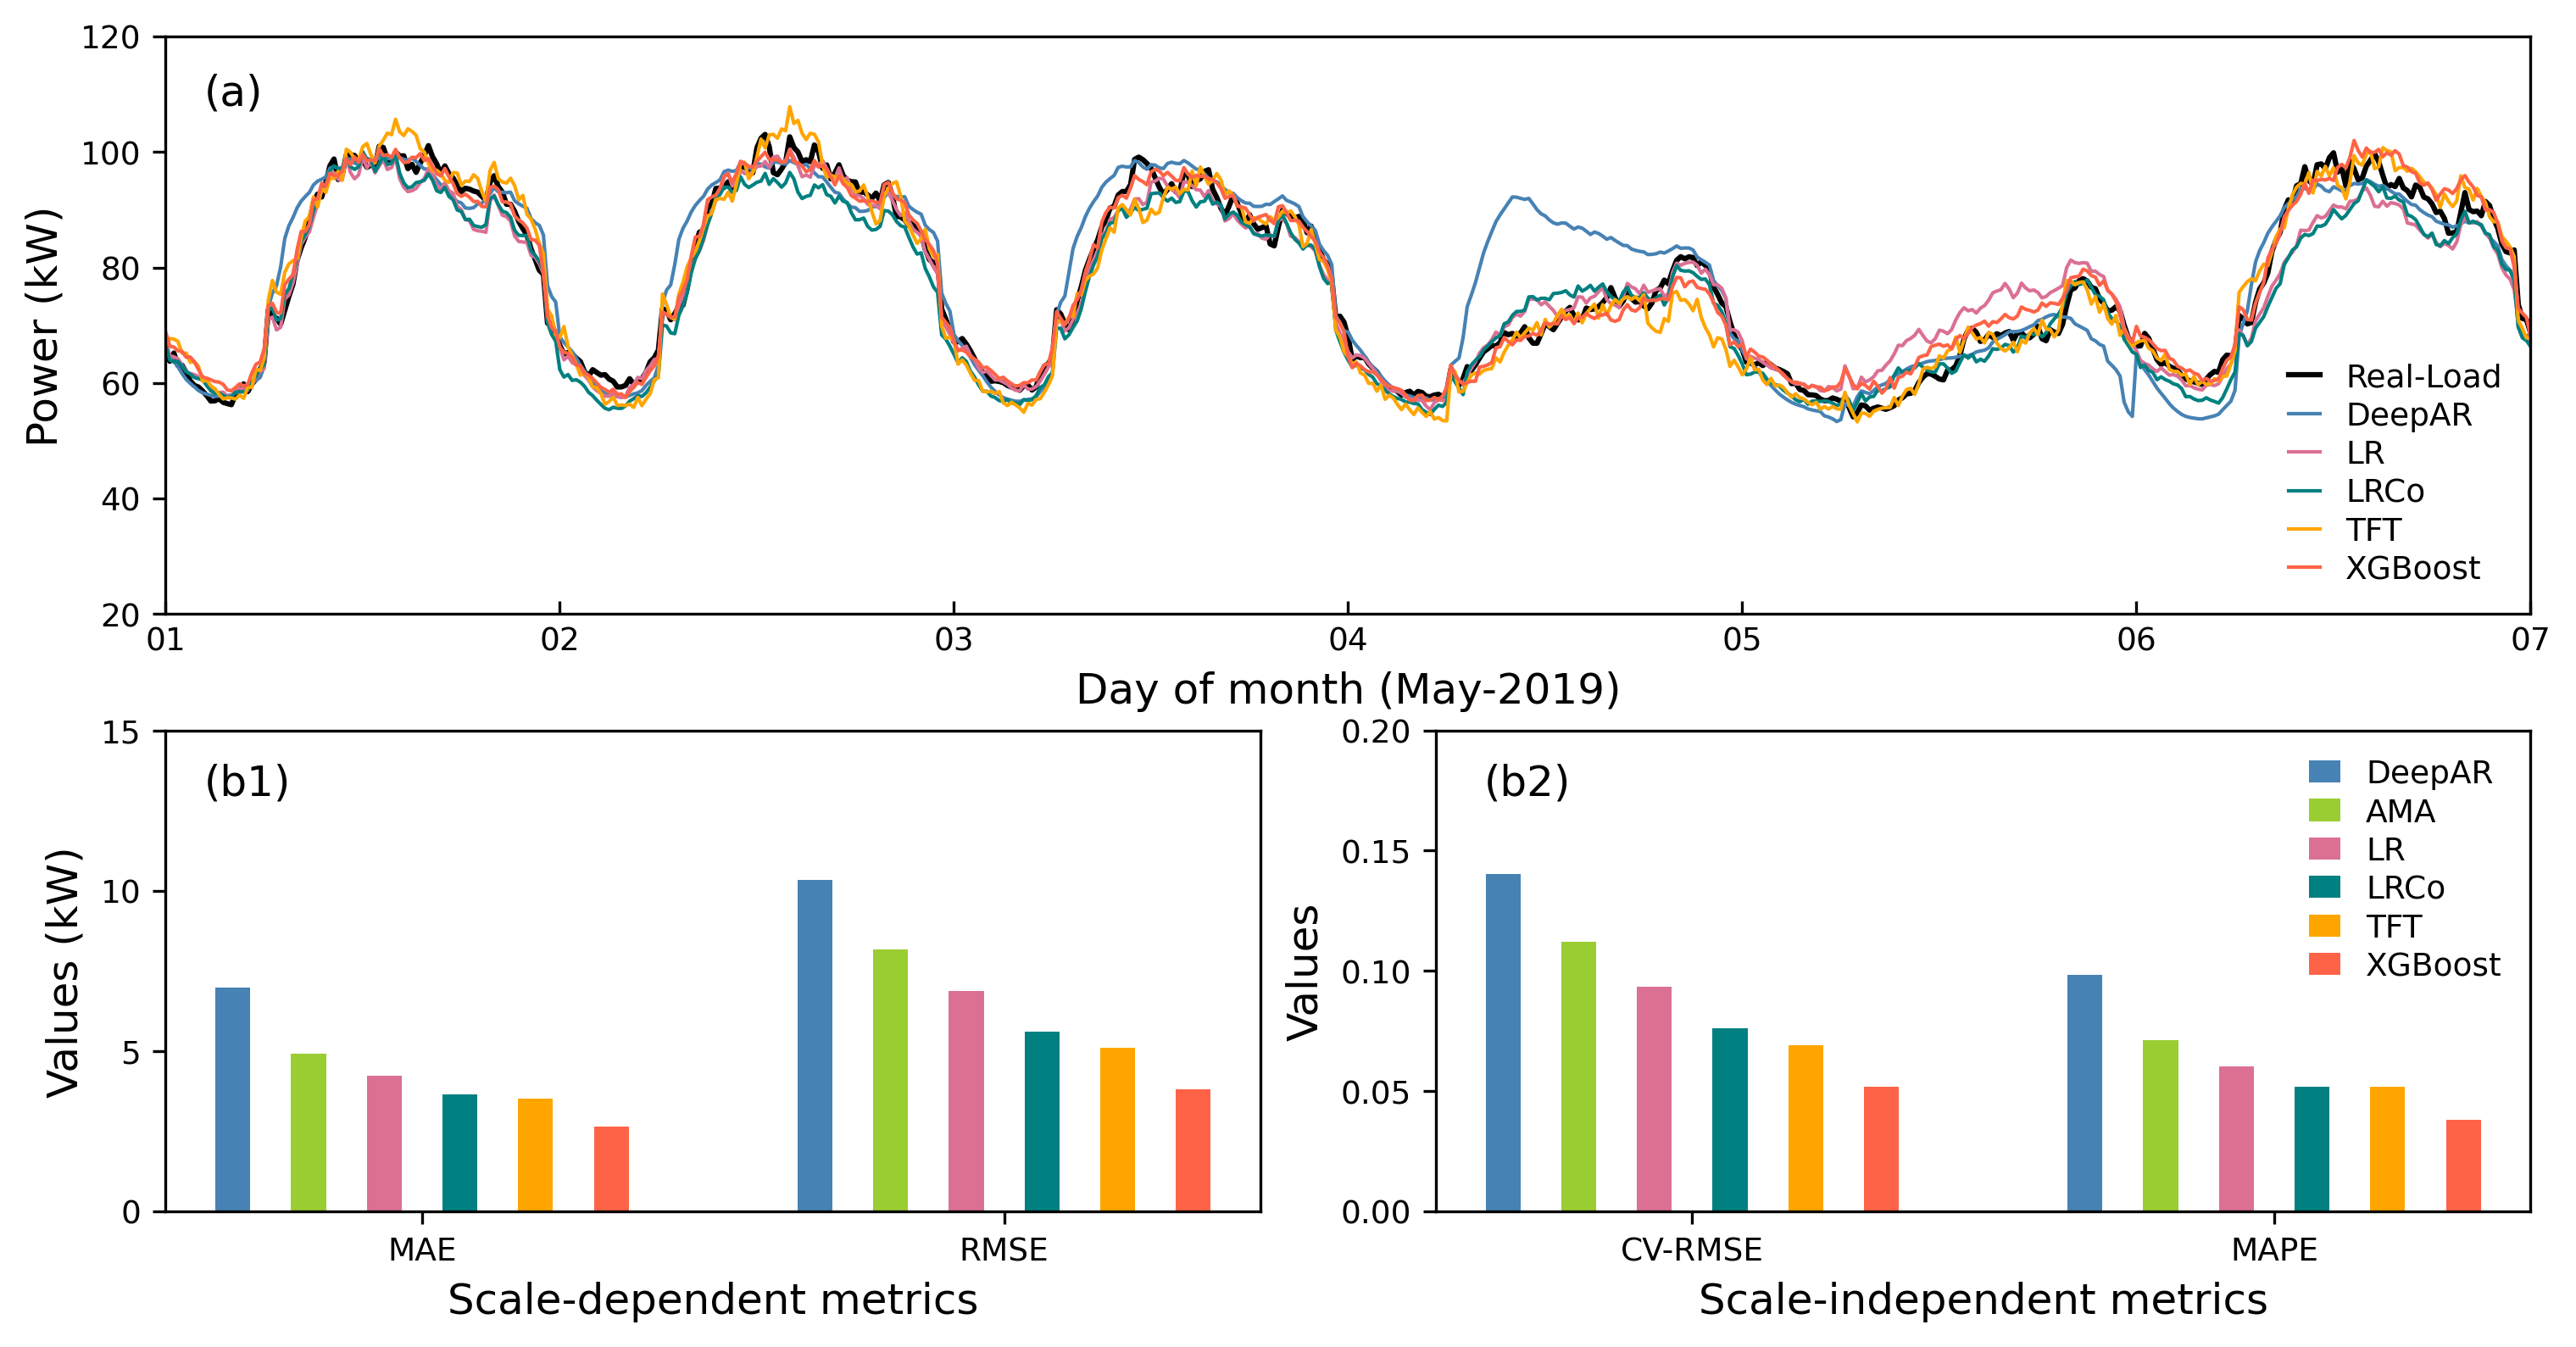

In [6]:
import matplotlib.dates as mdates
import matplotlib.gridspec as Gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
import numpy as np


label_dic={
    'DeepAR_optuna':'DeepAR',
    'Heuristic':"AMA",
    'LR_NAIVE':'LR',
    'LR_PCo':'LRCo',
    'TFT_optuna':'TFT',
    'XGB':'XGBoost',
    
}
# Set the format of xticklabels


fig = plt.figure(figsize=(12,6))
gs = Gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1.2, 1]) 
gs.update(wspace =0.16, hspace = 0.22)

ax1 = fig.add_subplot(gs[0, :]) # 占据第一行的所有列
#ax1.text(0.5, 0.5, "1st plot", verticalalignment='center', ha='center') 
ax2 = fig.add_subplot(gs[1, 1])
#ax2.text(0.5, 0.5, "2nd plot", verticalalignment='center', ha='center')
ax3 = fig.add_subplot(gs[1, 0])
#ax3.text(0.5, 0.5, "3rd plot", verticalalignment='center', ha='center')

ax1.plot(df_pred.index,df_pred['RealPower'],linewidth=1.5,label='Real-Load',color='black')


for key in methods:
    ax1.plot(df_pred.index,df_pred[key],linewidth=1,label=label_dic[key],color=color_dic_glb[key])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax1.set_ylim(20,120)
ax1.set_xlim(df_pred.index.min(),df_pred.index.max())
ax1.set_xlabel('Day of month (May-2019)',fontsize=label_fs)
ax1.set_ylabel('Power (kW)',fontsize=label_fs)
ax1.legend(fontsize=ticklabel_fs)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticklabel_fs)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=ticklabel_fs)
ax1.tick_params(direction='in',axis='x')


bar_width = 0.35  
tick_label=['CV-RMSE', 'MAE', 'MAPE', 'RMSE']

metrics1=metrics[['CV-RMSE', 'MAPE']]
tick_label1=['CV-RMSE','MAPE']
metrics2=metrics[['MAE', 'RMSE']]
tick_label2=[ 'MAE', 'RMSE']

k=0
x = np.arange(2)
for i in label_dic.keys():
    ax2.bar(x+0.13*k, np.array(metrics1.loc[i].values), 0.06, align='center', edgecolor=color_dic_glb[i],linewidth=0,
            color=color_dic_glb[i],alpha=1, label=label_dic[i])
    k+=1
ax2.set_ylim(0,0.2)
ax2.set_xticks(x+0.13*2.5, tick_label1,fontsize=ticklabel_fs)
ax2.set_xlabel('Scale-independent metrics',fontsize=label_fs)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=ticklabel_fs)
ax2.set_ylabel('Values',fontsize=label_fs)
ax2.legend(fontsize=ticklabel_fs)

k=0
x = np.arange(2)
for i in label_dic.keys():
    ax3.bar(x+0.13*k, np.array(metrics2.loc[i].values), 0.06, align='center', edgecolor=color_dic_glb[i],linewidth=0,
            color=color_dic_glb[i],alpha=1, label=label_dic[i])
    k+=1
ax3.set_ylim(0,15)
ax3.set_xticks(x+0.13*2.5, tick_label2, fontsize=ticklabel_fs)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=ticklabel_fs)
ax3.set_xlabel('Scale-dependent metrics',fontsize=label_fs)
ax3.set_ylabel('Values (kW)',fontsize=label_fs)

ax3.text(-0.05,13,'(b1)',fontsize=label_fs)
ax3.text(2.15,13,'(b2)',fontsize=label_fs)
ax3.text(-0.05,34.5,'(a)',fontsize=label_fs)


